## TODO:

- compute the lj potential and the total energy
- add the chack for the conditions
- plot the energies
- plot the trajectoires (chose a particle, chose a timestep)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.constants import Boltzmann

In [3]:
DT = 0.01
MAX_DISTANCE = 10
TOTAL_PARTICLES = 5
MAX_TIME_STEPS = 100
MASS = 39.95 # argon MM
TEMPERATURE = 293

## Useful functions

In [113]:
def initial_conditions(
    particles_number,
    temperature,
    max_distance,
    mass
):
    result = {}
    for key in range(particles_number):
        result[key] = {
            'position': [init_position(max_distance)],
            'velocity': [init_velocity(temperature, mass)]
        }
    for key in result.keys():
        result[key]['acceleration'] = [update_acceleration(key, result)]
    return result


def init_position(max_distance):
    return np.random.uniform(-max_distance, max_distance, size=3)


def init_velocity(temperature, mass):
    return (np.random.rand(3) - 0.5) * np.sqrt(Boltzmann * temperature / (mass * 1.602e-19))


def init_acceleration():
    return np.ones(3)

# --------------------------------------------------------------------------------------------------------------------

def update_conditions(sample, new_conditions):
    for key in sample.keys():
        for observable, value in new_conditions[key].items():
            sample[key][observable].append(value)


# TODO: pass the new positions and not the current in the accelerations get
def get_new_conditions(sample, time):
    result = {}
    for key, particle in sample.items():
        result[key] = {}
        result[key]['position'] = update_position(time, particle)
        result[key]['acceleration'] = update_acceleration(key, sample)
        result[key]['velocity'] = update_velocity(time, particle['velocity'][-1], [particle['acceleration'][-1], result[key]['acceleration']])
    return result


def update_position(time, particle):
    return particle['position'][-1] + particle['velocity'][-1]*time + 0.5*particle['acceleration'][-1]*time**2


def update_velocity(time, velocty, accelaretion: list):
    ''' Verlet velocity algorithm: mean is applied to acceleration to compensate discretized error '''
    return velocty + np.mean(accelaretion)*time


def update_acceleration(index, sample):
    positions = [particle['position'][-1] for particle in sample.values()]
    accelerations = []
    for i in range(len(positions)):
        if i == index:
            continue
        position_differences = positions[index] - positions[i]
        forces = lj_forces(abs(position_differences), 0.0103, 3.4)
        accelerations.append([
            (position_difference/np.sqrt(position_difference**2)) * forces[n] / 0.001
            if position_difference != 0 else 0
            for n, position_difference in enumerate(position_differences)
        ])
    return np.sum(accelerations, axis=0)

# --------------------------------------------------------------------------------------------------------------------

def lj_potential(positions, epsilon, sigma):
    pass


def lj_forces(positions, epsilon, sigma):
    '''   
        Parameters
        ----------
        r: float
            Distance between two particles (Å)
        epsilon: float 
            Potential energy at the equilibrium bond 
            length (eV)
        sigma: float 
            Distance at which the potential energy is 
            zero (Å)
    '''
    return [
        48 * epsilon * np.power(sigma, 12) / np.power(position, 13) - 24 * epsilon * np.power(sigma, 6) / np.power(position, 7)
        if position !=0 else 0
        for position in positions
    ]


def apply_elastic_collision():
    pass


def check_position():
    if False:
        apply_elastic_collision()
    pass


def get_kinetic_energy(velocity):
    return 0.5*MASS*velocity**2

## Dynamics

In [123]:
sample = initial_conditions(TOTAL_PARTICLES, TEMPERATURE, MAX_DISTANCE, MASS)

# TODO: add energy computation
# TODO: compute momenta
for time in range(MAX_TIME_STEPS):
    new_conditions = get_new_conditions(sample, DT)
    check_position()
    update_conditions(sample, new_conditions)
    #print(time, '\n', sample)

## Plots

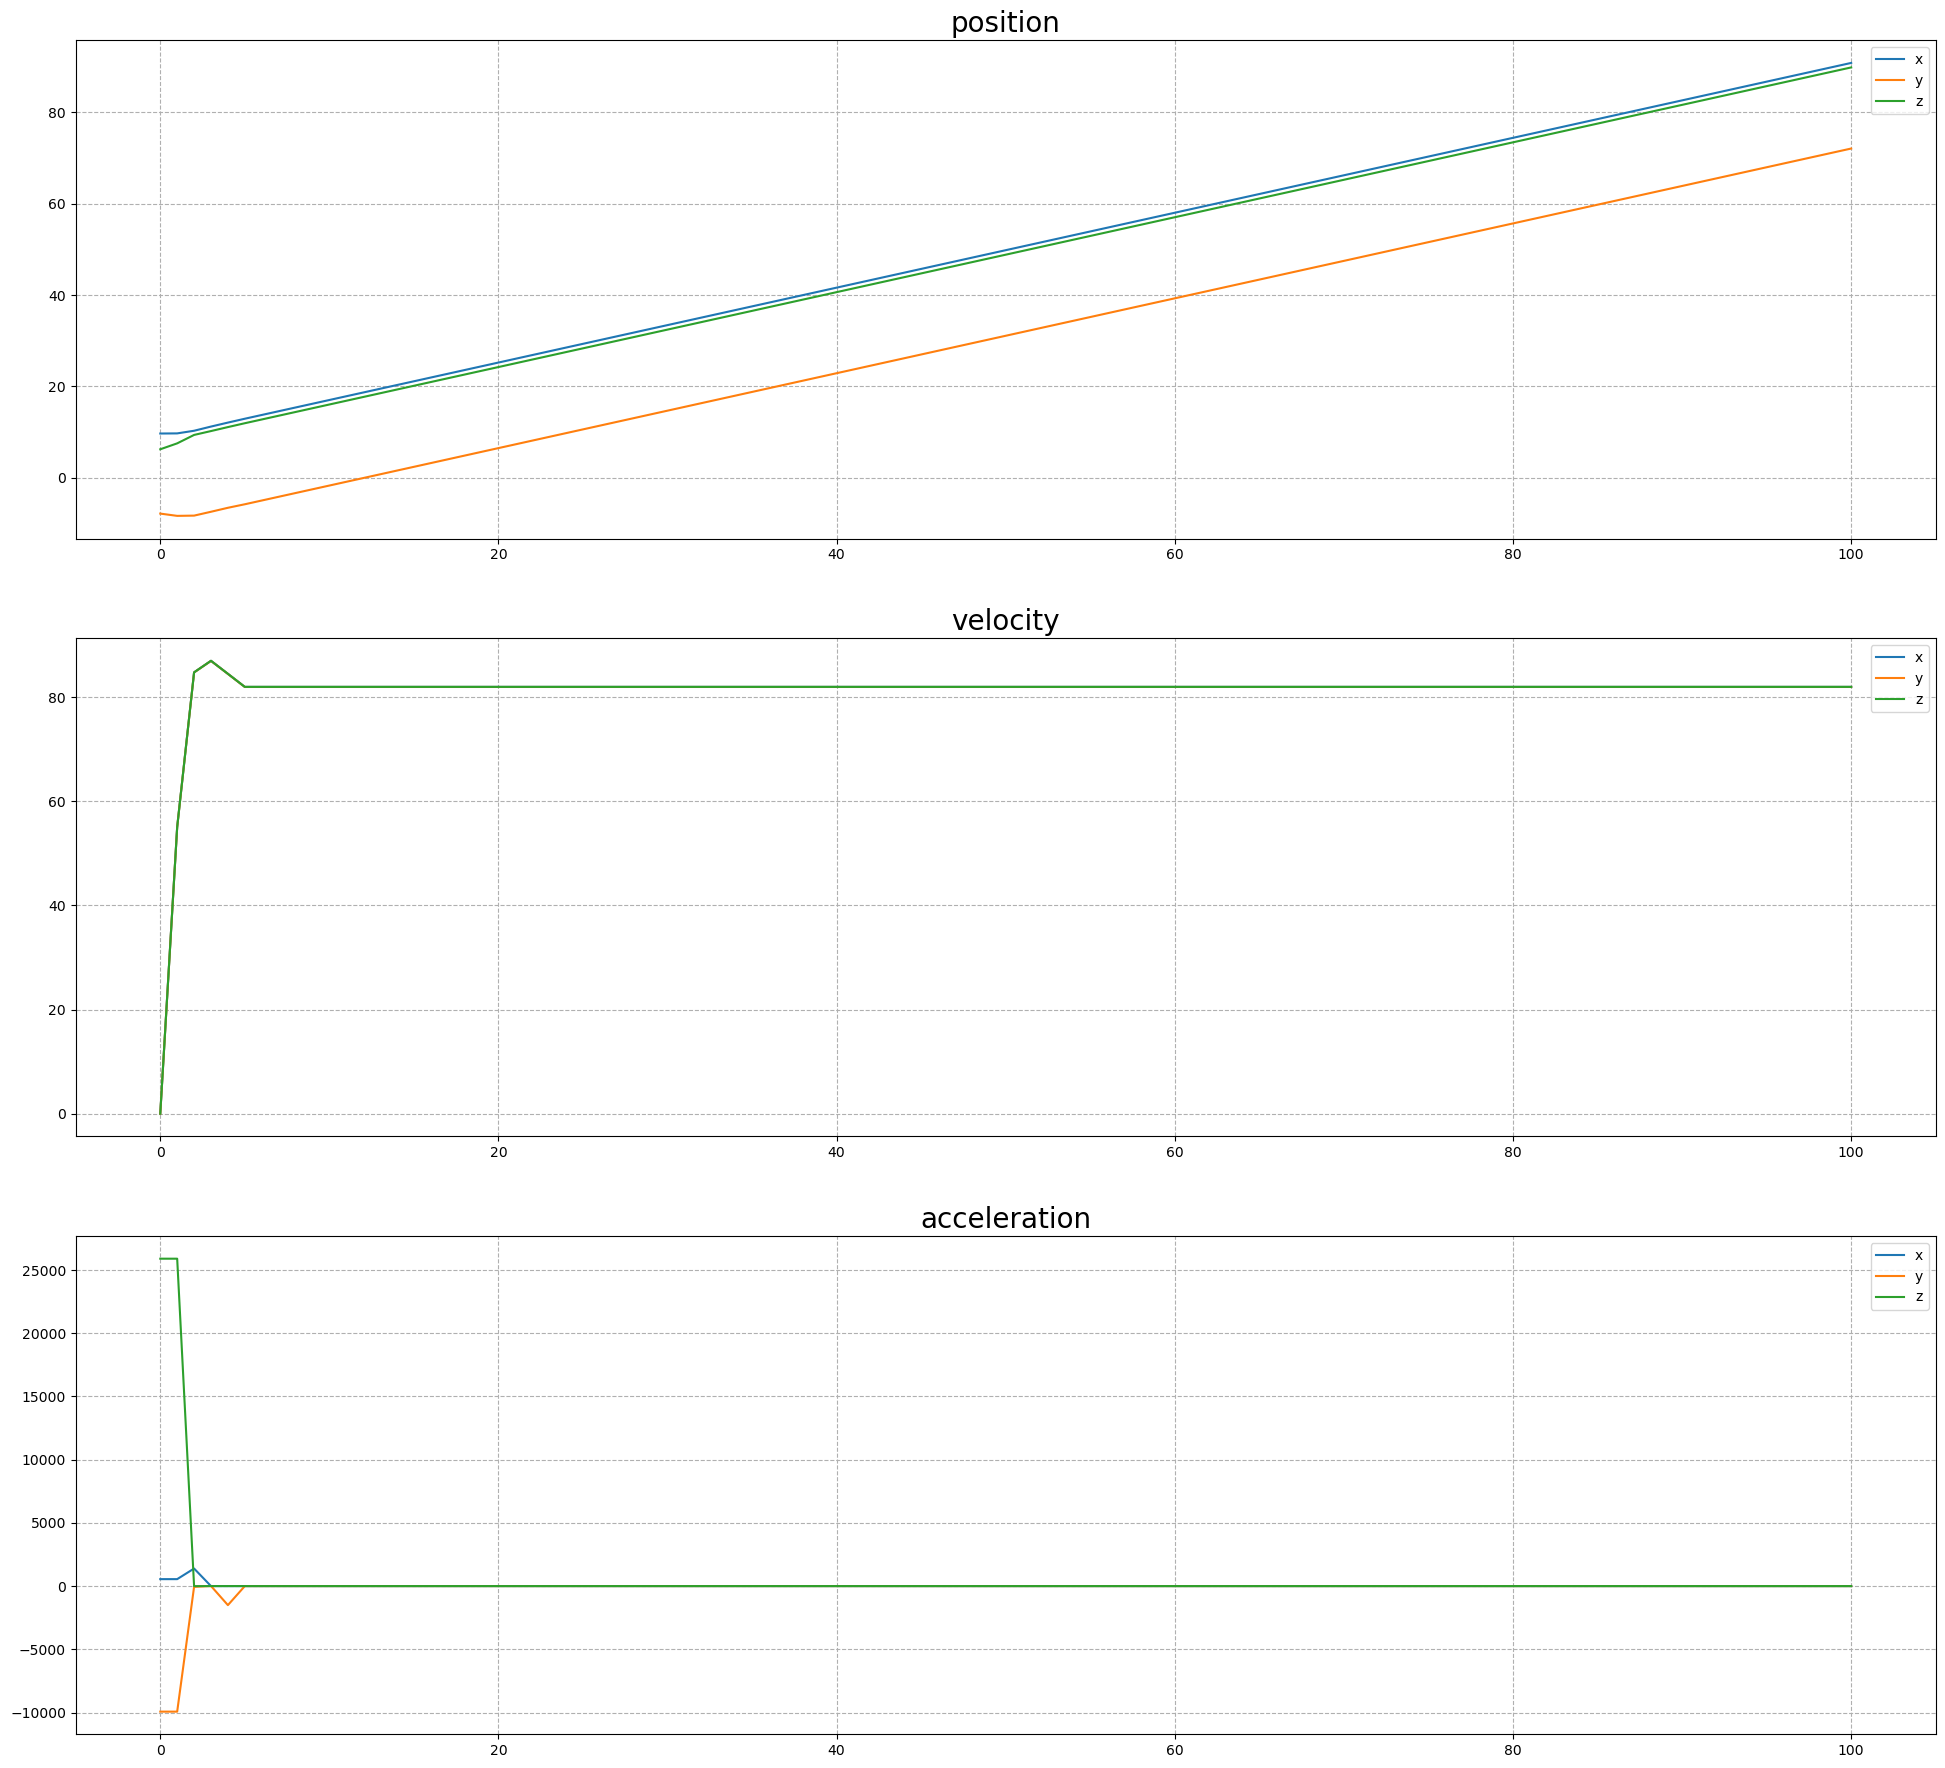

In [134]:
plt.figure(figsize=(24,22))
particle_number = 1

plt.subplot(3,1,1)
plt.plot(np.array(sample[particle_number]['position'])[:,0], label='x')
plt.plot(np.array(sample[particle_number]['position'])[:,1], label='y')
plt.plot(np.array(sample[particle_number]['position'])[:,2], label='z')
plt.title('position', fontsize=20)
plt.grid(linestyle='--')
plt.legend()

plt.subplot(3,1,2)
plt.plot(np.array(sample[particle_number]['velocity'])[:,0], label='x')
plt.plot(np.array(sample[particle_number]['velocity'])[:,1], label='y')
plt.plot(np.array(sample[particle_number]['velocity'])[:,2], label='z')
plt.title('velocity', fontsize=20)
plt.grid(linestyle='--')
plt.legend()

plt.subplot(3,1,3)
plt.plot(np.array(sample[particle_number]['acceleration'])[:,0], label='x')
plt.plot(np.array(sample[particle_number]['acceleration'])[:,1], label='y')
plt.plot(np.array(sample[particle_number]['acceleration'])[:,2], label='z')
plt.title('acceleration', fontsize=20)
plt.grid(linestyle='--')
plt.legend()

plt.show()